In [1]:
# for easier coloration, ggplot is useful
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt
from altair.expr import datum
import seaborn as sns
sns.set()

## EDA

In [2]:
df = pd.read_csv('baseball.csv')
df.head() 

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


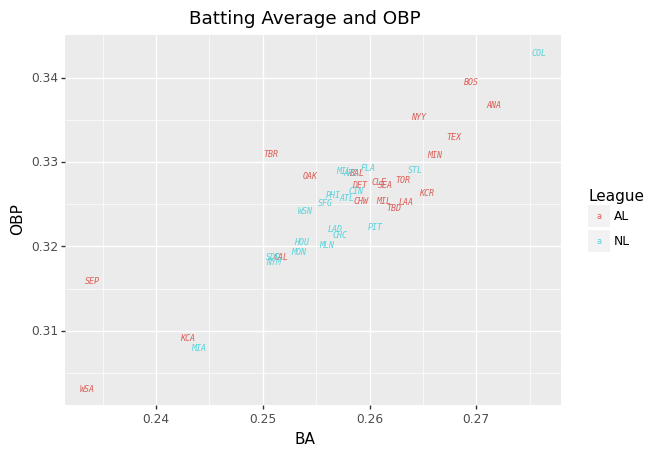

<ggplot: (139580391181)>

In [3]:
teams = df.groupby(['Team','League']).mean(numeric_only=True).reset_index().sort_values(by = 'BA', ascending = False)
ggplot(teams) + aes(x='BA', y='OBP', color='League', label = 'Team') + ggtitle('Batting Average and OBP') + geom_text(family="monospace", size=6, fontstyle="italic")

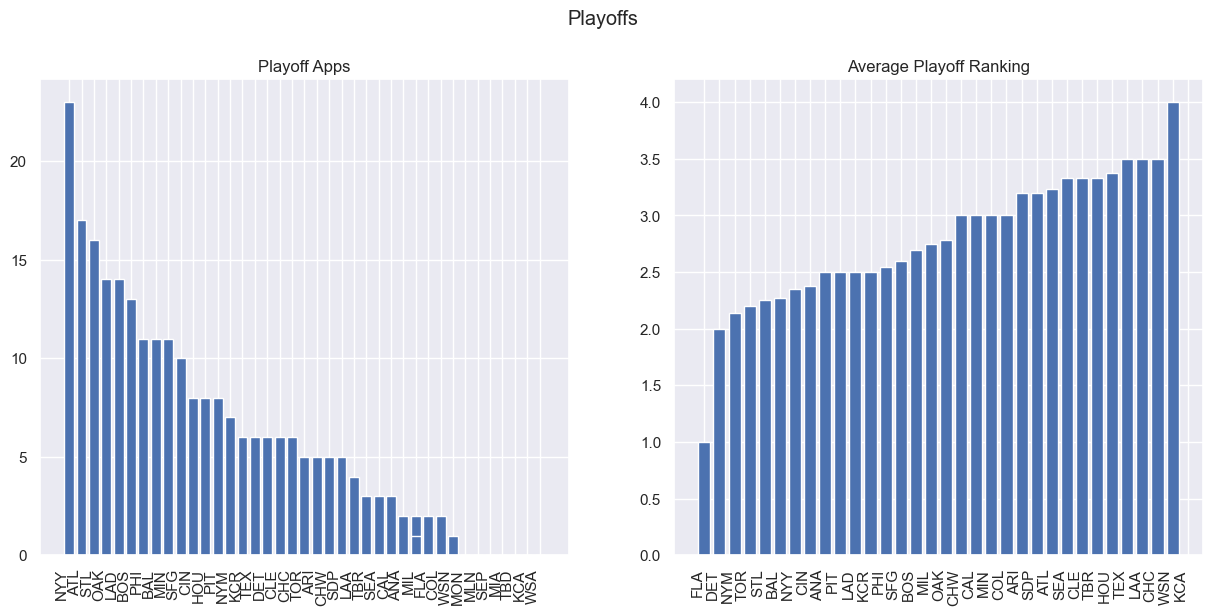

In [4]:
post = df.groupby(['Team', 'League']).sum().reset_index().sort_values(by = 'Playoffs', ascending = False)
team = teams.groupby('Team').mean(numeric_only=True).sort_values(by = 'RankPlayoffs', ascending = True).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(15,7))
plt.suptitle('Playoffs')
ax[0].bar(x = post['Team'], height = post['Playoffs'])
ax[0].title.set_text('Playoff Apps')
ax[1].bar(x = team['Team'], height=team['RankPlayoffs'])
ax[1].title.set_text('Average Playoff Ranking')
fig.autofmt_xdate(rotation=90)
plt.show()

## Description
I chose this dataset as I am a big baseball fan and spring training has just started, making this the perfect time to look at baseball datasets. This particular dataset contains information on teams from 1962 to 2012, where there is an entry for each team once a year. Here is the link to the dataset: [link](https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012). <br> <br>
The first graph plots average OBP vs avg BA for each team in the entire dataset. From this graph, we can see that batting average and on bas percentage seem to have a positive correlation, and we can also see that in general, teams in the AL (american league) tend to have higher BA's and OBP's throughout the entire dataset. <br> <br>
The second graph shows the total amount of playoff appearences for each team alongside another plot that shows the average seed or ranking for years where they made they playoffs (1 being the highest ranked and 4 the lowest). From these charts, we can see that the New York Yankees have made the playoffs the most of any other team with close to 25 appearances, whereas the next closest team only has 17 appearances. We can also see they are generally highly ranked when they make the playoffs, with an average ranking of about 2.25. We can also see that teams like Detroit have not made the playoffs very often, with only 6 apps, but are generally highly ranked with an avg rating of 2.

## Altair Plots

##### New Plot type with color encoding and interactive

In [5]:
selector = alt.selection_point(fields=['League'])
color_scale = alt.Scale(domain=['AL', 'NL'],
                        range=['#1FC3AA', '#8624F5'])

base = alt.Chart(df, title = 'BA vs SLG').properties(
    width=250,
    height=250
).mark_point(filled=True, size=75).encode(
    x=alt.X('BA:Q', scale=alt.Scale(domain=[0.15,0.4])),
    y=alt.Y('SLG:Q', scale=alt.Scale(domain=[0.2,0.55])),
    color=alt.condition(
        selector,
        'League:N',
        alt.value('lightgray')
), tooltip=["Team:N", 'Year']).add_params(selector)

hists = alt.Chart(df, title="Distributions of Wins for Each League").mark_bar(
    opacity=0.3,
    binSpacing=0
).encode(
    x=alt.X('W',
            bin=alt.Bin(step=3), # step keeps bin size the same
            scale=alt.Scale(domain=[25,120])),
    y=alt.Y('count()',
            stack=None,
            scale=alt.Scale(domain=[0,100])),
    color=alt.Color('League:N', scale=color_scale)
).transform_filter(
    selector
).properties(
    width=250,
    height=250
)
base | hists

alt.HConcatChart(...)

This is a linked layered histogram which uses color as an encoding to distinguish between the league of teams. The interactive features additionally include a tooltip on the scatter plot to see which team and year each point represents. I believe color is an effective way to distinguish between leagues of each team because it effectivly separates the values whereas size would not be as effective. The layered histogram uses the same color encoding to show the distribution of team wins by league. The distributions seems to be about the same.

##### Second Interactive Plot

Note that interactive plot might not display properly in chrome, but displays in latest version of edge

In [6]:
resize = alt.selection_interval(bind='scales')
year = df.groupby(['Team', 'Year', 'League']).mean(numeric_only=True).reset_index()
slider = alt.binding_range(min=1962,
                           max=2012,
                           step = 1)
select_date = alt.selection_point(name='Year',
                                   fields=['Year'],
                                   bind=slider)

league_dropdown = alt.binding_select(options=[None, 'AL', 'NL'], name="League")
league_select = alt.selection_point(fields=['League'], bind=league_dropdown)

slider_chart = alt.Chart(year, title = 'Wins vs Sluggin Pct with Interactive Slider and Tooltip').mark_point(
).transform_filter(
    select_date
).transform_filter(league_select
                  ).encode(
    alt.X('SLG', title='Slugging Percentage'),
    alt.Y('W', title = 'Wins'), tooltip="Team:N",
    color=alt.Color('League', scale=alt.Scale(scheme='dark2'))
).add_params(
    select_date, resize, league_select
)


slider_chart

alt.Chart(...)

This plot has multiple interactive features including a tooltip to show which team a point represents, a drop down filter to chose which league to view, and a slider to choose the displayed year.  I chose these interactive features as they provide good ways to filter the entries and view a subset of the desired data and gain insights on a smaller level. It is difficult to draw conclusions with every point displayed, show filtering the data allows for easier analysis.
<br> <br>
This chart also uses color to distinguish the leagues. Again, I believe color is an effective way to distinguish between leagues of each team because it effectivly separates the values whereas size would not be as effective.

### Citation

All code used for altair plotting was based off example code from [this link](https://altair-viz.github.io/gallery/index.html#distributions). <br> <br>
Other plotting was from previous knowledge or classes.